In [1]:
import numpy as np
import mat73
import skimage.io as skio
import os
import matplotlib.pyplot as plt
import cv2
from skimage.util import img_as_uint, img_as_ubyte
from skimage import exposure, transform, filters
import sys
sys.path.append("../SpikeCounter")
from spikecounter.ui import visualize, HyperStackViewer
from spikecounter import utils

In [2]:
datadir = os.path.join("../dualcam_cal/")

In [3]:
reg_cam1 = skio.imread(os.path.join(datadir, "120306cal_cam1.tiff"))
reg_cam2 = skio.imread(os.path.join(datadir, "120311cal_cam2.tiff"))

(2304, 2304)
[0 1 2]


<IPython.core.display.Javascript object>


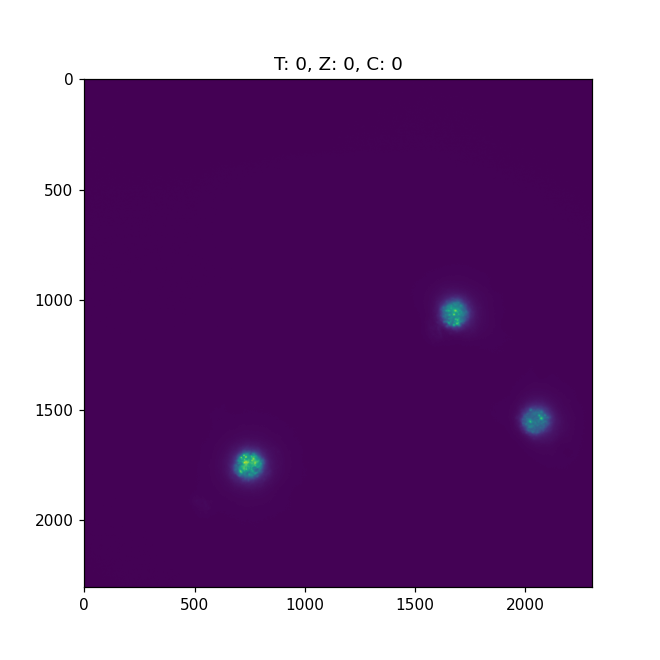

In [4]:
%matplotlib notebook
h = HyperStackViewer(reg_cam1, width=6, height=6)
h.select_points_clicky(3)

In [77]:
cam1_points = np.array(h.points)

(1024, 1024)
[0 1 2]


<IPython.core.display.Javascript object>


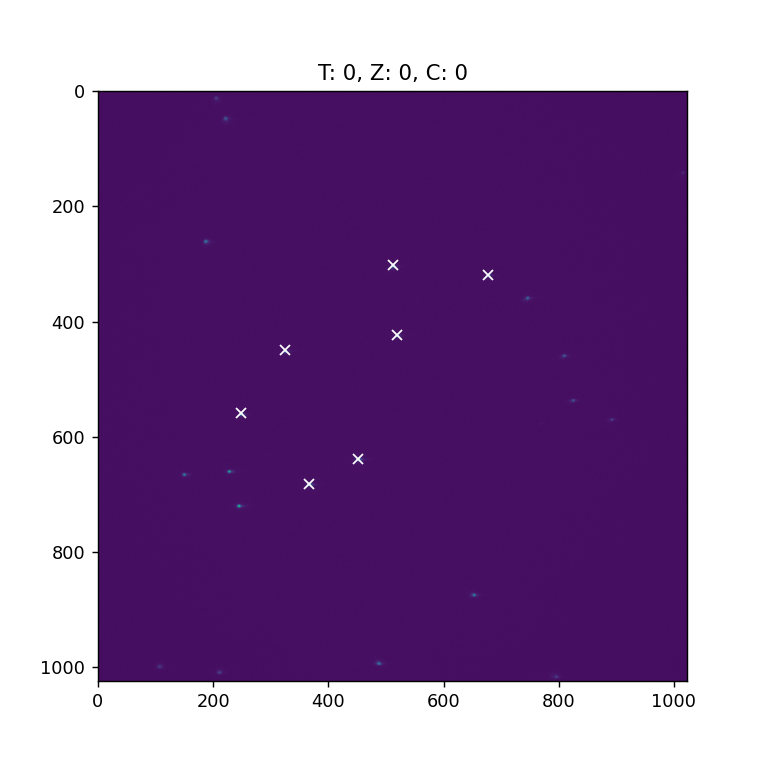

In [78]:
h = HyperStackViewer(oneP_img[512:-512,512:-512], width=6, height=6)
h.select_points_clicky(7)

In [89]:
oneP_points = np.array(h.points) + np.array([512,512])

In [91]:
h, mask = cv2.findHomography(np.array(twoP_points), oneP_points, cv2.RANSAC)

In [93]:
height, width = oneP_img.shape

In [94]:
im1Reg = cv2.warpPerspective(twoP_img, h, (width, height))

<IPython.core.display.Javascript object>


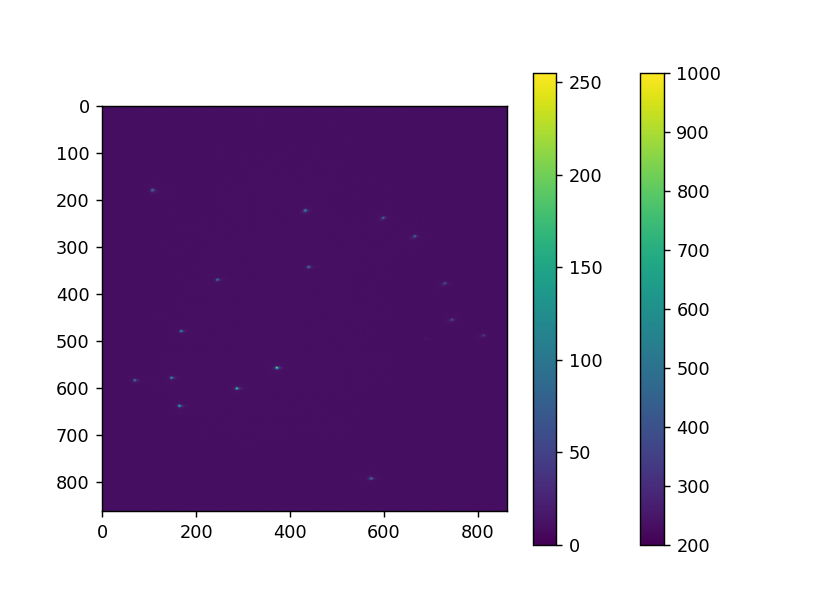

In [95]:
plt.imshow(im1Reg)